# SUP ML 1 - PREPROCESSING

# Librerias

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
from scipy import stats

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

# Importar train data

In [297]:
df = pd.read_csv('.\\data\\telecom_churn_TRAINTEST.csv')
dictionary = pd.read_csv('.\\data\\variable_dictionary.csv')

In [298]:
df.head(10)

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.00,0.00,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.10,9.10,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,7.0,6.0,WC,1.0,1.0,NaN,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.00,0.00,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,2.0,1.0,NaN,0.0,0.0,O,7.0,S,M,2.0,M,5.0,2.0,C,A,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.00,0.00,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,1.0,1.0,NaN,0.0,0.0,NaN,6.0,M,M,4.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.00,0.00,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,R,5.0,M,S,1.0,M,6.0,1.0,C,O,0.0,I,U,U,U,U,U,Y,434.0,1000005
5,82.2750,1312.25,75.000,1.2375,0.00,0.00,0.00,0.0,0.0,156.75,8.1450,52.000000,0.0,7.666667,0.0,76.000000,0.0,702.000000,0.0,365.000000,0.0,577.333333,0.0,4.333333,11.000000,7.753333,301.666667,1.333333,369.536667,0.0,200.320000,370.333333,243.213333,147.000000,85.146667,555.666667,0.0,382.096667,0.0,


# Crear la nueva columna 'HIJOS'
df['HIJOS'] = 'N'

# Identificar si tienen al menos un hijo en alguna de las edades
mask = (df['kid0_2'] == 'Y') | (df['kid3_5'] == 'Y') | (df['kid6_10'] == 'Y') | (df['kid11_15'] == 'Y')| (df['kid16_17'] == 'Y')

# Actualizar la columna 'HIJOS' a 'Y' si tienen al menos un hijo
df.loc[mask, 'HIJOS'] = 'Y'

del(df['kid0_2'],df['kid3_5'],df['kid6_10'],df['kid11_15'],df['kid16_17'])

df["ethnic"].value_counts().sort_values(ascending=False)

del(df["ethnic"])

del(df["dwllsize"])

del(df["infobase"])

def obten_lista_eliminar(dataset, columna, umbral):
  lista_borrar= []  
  tabla=dataset[columna].value_counts().reset_index()
  print(tabla)
  for i in range(0,len(tabla)):
    if (tabla.iloc[i]["count"]) < umbral:
      lista_borrar.append(tabla.iloc[i][columna])
  return lista_borrar

In [299]:
#lista_eliminar_crclscod = obten_lista_eliminar(df, "crclscod", 1400)

In [300]:
#def eliminar_lista_df(dataset, columna, lista_eliminar):
#  dataset.drop(dataset[dataset[columna].isin(lista_eliminar)].index, inplace=True)



In [301]:
#eliminar_lista_df(df,"crclscod",lista_eliminar_crclscod)

In [302]:
#df["crclscod"].value_counts().sum()

#TODO LO ANTERIOR SON PRUEBAS DE FEATURE ENGENIEERING Y LIMPIEZA DE DATOS, PERO SOLO HACEN QUE EMPEORAR EL MODELO FINAL

# EDA: Analisis Exploratorio

## Distribución del target

In [303]:
df.shape

(90000, 100)

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               89866 non-null  float64
 1   mou               89866 non-null  float64
 2   totmrc            89866 non-null  float64
 3   da                89866 non-null  float64
 4   ovrmou            89866 non-null  float64
 5   ovrrev            89866 non-null  float64
 6   vceovr            89866 non-null  float64
 7   datovr            89866 non-null  float64
 8   roam              89866 non-null  float64
 9   change_mou        89405 non-null  float64
 10  change_rev        89405 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float

In [305]:
df.set_index('Customer_ID', inplace=True)

In [306]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
rev,89866.0,NaN,NaN,NaN,58.312895,46.084103,-5.8625,33.0275,47.6675,70.19375,3843.2625
mou,89866.0,NaN,NaN,NaN,504.277946,516.170057,0.0,148.5,349.0,689.0,12206.75
totmrc,89866.0,NaN,NaN,NaN,45.880669,23.370435,-26.915,30.0,44.99,59.99,409.99
da,89866.0,NaN,NaN,NaN,0.877813,2.173665,0.0,0.0,0.2475,0.7425,159.39
ovrmou,89866.0,NaN,NaN,NaN,40.798976,96.970619,0.0,0.0,2.5,41.25,4320.75
...,...,...,...,...,...,...,...,...,...,...,...
kid6_10,88549,2,U,81196,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kid11_15,88549,2,U,80497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kid16_17,88549,2,U,79419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
creditcd,88549,2,Y,61716,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [307]:
for i in list(df.select_dtypes(include='object').columns):
  print(i)
  print('Unique:',df[i].nunique())
  print(df[i].value_counts(),'\n')

new_cell
Unique: 3
new_cell
U    58812
Y    18114
N    13074
Name: count, dtype: int64 

crclscod
Unique: 54
crclscod
AA    34152
A     15602
BA    11270
CA     7389
EA     5521
B      3743
DA     3201
ZA     3177
C      1418
A2      771
U       429
E       330
E4      305
GA      265
D       244
G       236
I       231
JF      192
Z       187
J       169
M       153
C2      152
D4      107
Z4       94
K        93
W        84
V1       70
U1       56
EM       46
B2       42
Y        38
EC       32
O        24
CY       21
E2       19
CC       19
D5       16
C5       14
IF       14
ZY       12
Z1       11
Z5        8
H         8
TP        5
D2        5
GY        5
L         4
EF        4
Z2        4
A3        3
P1        2
S         1
V         1
ZF        1
Name: count, dtype: int64 

asl_flag
Unique: 2
asl_flag
N    79401
Y    10599
Name: count, dtype: int64 

prizm_social_one
Unique: 5
prizm_social_one
S    29203
U    20935
C    15244
T    13705
R     4376
Name: count, dtype: int64 

a

In [308]:
#Dividimos el split X-y

target = 'churn'
features = df.columns[df.columns != target]

In [309]:
y = df[target]
X = df[features]

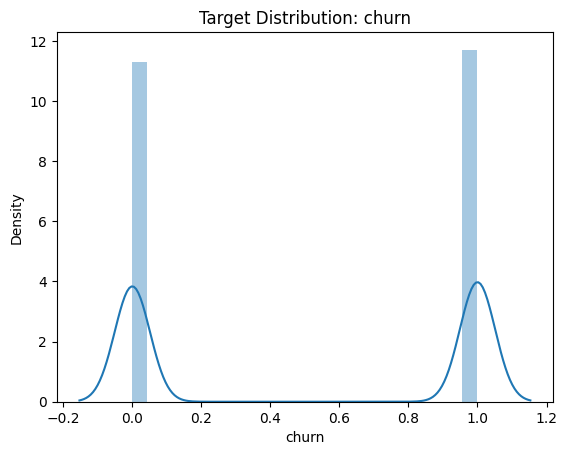

In [310]:
sns.distplot(y)
plt.title('Target Distribution: '+target)
plt.show()

## Analisis Univariable

* Distribucion de cada variable

In [311]:
target = 'churn'
features = df.columns[df.columns != target]

In [312]:
X = df[features]
y = df[target]

In [313]:
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]

    for i in dataset:
        if    (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind == "O")  and i not in target:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

In [314]:
lista_numericas, lista_boolean, lista_categoricas= obtener_lista_variables(df)

Tanto esta serie de plots como el siguiente estan comentandos, porque son tantas variables con tantas gráficas, que es imposible sacar conclusiones de ellas y ralentizando la ejecución

In [315]:
# for i in lista_numericas:
#  sns.distplot(X[i])
#  plt.title('Distribucion '+i)
#  plt.show()

## Analisis Variable-Target

* Relacion target-variable

In [316]:
#sns.pairplot(df,x_vars=features, y_vars=target)
#plt.show()

# Data Cleaning

* Eliminar filas sin target informado.
* Eliminar filas duplicadas (si tenemos ID, solo puede haber 1 registro por ID)
* Eliminar filas/columnas vacías y columnas irrelevantes
* Corregir data types incorrectos
* Categoricos: Corregir literales incorrectos (acentos, erratas, etc)
* Fechas y textos: convertir a variables numericas (hour, day, month, year...) o categoricas (weekday_name...)

In [317]:
#Vemos algun registro sin el target  informado
df['churn'].isna().any()

False

In [318]:
#Comprobamos duplicados

df.index.nunique() != len(df.index)


False

In [319]:
len(df[df.duplicated()])

0

In [320]:
categories = df.select_dtypes(include='object').columns

In [321]:
print((df.isna().sum(axis=1)==df.shape[1]).sum(),'all-empty rows were deleted')
df.dropna(axis=0, how='all',inplace=True)
print(df.shape)

0 all-empty rows were deleted
(90000, 99)


# Imputación de nulos

* MODELOS DE ARBOLES: Imputar valor outlier. 
* MODELOS LINEALES: imputar media, mediana o moda.
* Si vamos a practicar un Torneo de Modelos, preferible imputar valor outlier.

In [322]:
df.drop(df[df["rev"]<0].index,axis=0, inplace=True)
df.drop(df[df["totmrc"]<0].index,axis=0, inplace=True)
df.drop(df[df["avg6rev"]<0].index,axis=0, inplace=True)
df.drop(df[df["eqpdays"]<0].index,axis=0, inplace=True)

In [323]:
df.isna().sum()

rev          134
mou          134
totmrc       134
da           134
ovrmou       134
            ... 
kid6_10     1450
kid11_15    1450
kid16_17    1450
creditcd    1450
eqpdays        1
Length: 99, dtype: int64

In [324]:
100*X.isna().sum()/X.shape[0]

rev         0.148889
mou         0.148889
totmrc      0.148889
da          0.148889
ovrmou      0.148889
              ...   
kid6_10     1.612222
kid11_15    1.612222
kid16_17    1.612222
creditcd    1.612222
eqpdays     0.001111
Length: 98, dtype: float64

In [325]:
#Imputamos en las columnas numericas, outlier = -999

df[lista_numericas] = df[lista_numericas].fillna(-9999)

In [326]:
#Hacemos lo mismo, pero en las categoricas imputaremos como "Desconocido"

df[lista_categoricas] = df[lista_categoricas].fillna("desconocido")

In [327]:
df.isna().any().value_counts()

False    99
Name: count, dtype: int64

# Encoding categóricos

* Si tienen sentido ordinal, es decir, se pueden ordenar, encodear con una escala numerica. Ejemplo: {"Bajo":1, "Medio":2, "Alto":3}.
* Si tienen unicamente 2 clases, indicador booleano
* One Hot Encoding en resto de categoricos

In [328]:
# Aplicamos One Hot Encoding en los categoricos
df = pd.get_dummies(df, columns=lista_categoricas)

# Eliminar alta correlación

* Analizar variables (X) altamente correlacionadas
* Eliminar una variable de cada pareja altamente correlacionada (>95% o >99%...) en el dataset (df)

In [329]:
def highly_correlated(df, target, threshold):
    col_corr = list()
    colnames = list()
    rownames = list()
    y = df[target]
    X = df[df.columns[df.columns != target]]
    corr_matrix = X.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]
    
    return Z

In [330]:
#Hemos elegido 0.80 como alta correlación, ya que nos seguia pareciendo una correlacion muy alta entre features

In [331]:
highly_corr = highly_correlated(df, 'churn', 0.80)
highly_corr

,F1,F2,corr_F1_F2,corr_F1_target,corr_F2_target,F_to_delete
0,totmrc,rev,0.995498,0.037903,0.035396,rev
1,da,rev,0.993286,0.034007,0.035396,da
2,da,totmrc,0.998279,0.034007,0.037903,da
3,ovrmou,rev,0.985332,0.028995,0.035396,ovrmou
4,ovrmou,totmrc,0.971297,0.028995,0.037903,ovrmou
...,...,...,...,...,...,...
181,creditcd_desconocido,kid0_2_desconocido,1.000000,0.003027,0.003027,kid0_2_desconocido
182,creditcd_desconocido,kid3_5_desconocido,1.000000,0.003027,0.003027,kid3_5_desconocido
183,creditcd_desconocido,kid6_10_desconocido,1.000000,0.003027,0.003027,kid6_10_desconocido
184,creditcd_desconocido,kid11_15_desconocido,1.000000,0.003027,0.003027,kid11_15_desconocido


In [332]:
# Eliminamos las features altamente correlacionadas
drop_cols = list(highly_corr['F_to_delete'])
df.drop(columns=drop_cols, inplace=True)
print('Eliminadas columnas altamente correlacionadas:', drop_cols)

Eliminadas columnas altamente correlacionadas: ['rev', 'da', 'da', 'ovrmou', 'ovrmou', 'ovrmou', 'ovrrev', 'ovrrev', 'ovrrev', 'ovrmou', 'vceovr', 'vceovr', 'vceovr', 'ovrmou', 'ovrrev', 'datovr', 'datovr', 'datovr', 'ovrmou', 'ovrrev', 'vceovr', 'roam', 'roam', 'roam', 'ovrmou', 'ovrrev', 'vceovr', 'roam', 'change_rev', 'unan_vce', 'plcd_vce', 'comp_dat', 'custcare', 'cc_mou', 'inonemin', 'owylis_vce', 'mouowylisv', 'plcd_vce', 'recv_vce', 'peak_vce', 'peak_dat', 'peak_dat', 'mou_peav', 'peak_vce', 'opk_vce', 'recv_vce', 'opk_vce', 'opk_dat', 'opk_dat', 'mou_opkv', 'mou_opkd', 'blck_vce', 'unan_vce', 'plcd_vce', 'attempt', 'attempt', 'opk_vce', 'plcd_vce', 'comp_vce', 'owylis_vce', 'peak_vce', 'opk_vce', 'attempt', 'totcalls', 'totrev', 'adjrev', 'totrev', 'totcalls', 'totmou', 'totrev', 'adjrev', 'totcalls', 'adjqty', 'adjqty', 'avgmou', 'plcd_vce', 'avg3mou', 'avg3mou', 'mou_rvce', 'avg3mou', 'mou_opkv', 'attempt', 'avg3mou', 'avgmou', 'avg3qty', 'recv_vce', 'avg3qty', 'avg3qty', 'a

In [333]:
#Actualizamos el split X-y

target = 'churn'
features = df.columns[df.columns != target]

In [334]:
X = df[features]
y = df[target]

# Eliminar baja varianza

* Eliminar variables (X) practicamente constantes con un threshold minimo (1% o menos)

In [335]:
# Eliminamos columnas practicamente constantes (nula varianza)
vt = VarianceThreshold(threshold = 0.01)
vt.fit(X)

cols_lowvar = X.columns[vt.get_support()==False]
X.drop(columns=cols_lowvar,inplace=True)

print(len(cols_lowvar),' low variance features were removed:\n', cols_lowvar.to_list())

63  low variance features were removed:
 ['crclscod_A2', 'crclscod_A3', 'crclscod_B2', 'crclscod_C2', 'crclscod_C5', 'crclscod_CC', 'crclscod_CY', 'crclscod_D', 'crclscod_D2', 'crclscod_D4', 'crclscod_D5', 'crclscod_E', 'crclscod_E2', 'crclscod_E4', 'crclscod_EC', 'crclscod_EF', 'crclscod_EM', 'crclscod_G', 'crclscod_GA', 'crclscod_GY', 'crclscod_H', 'crclscod_I', 'crclscod_IF', 'crclscod_J', 'crclscod_JF', 'crclscod_K', 'crclscod_L', 'crclscod_M', 'crclscod_O', 'crclscod_P1', 'crclscod_S', 'crclscod_TP', 'crclscod_U', 'crclscod_U1', 'crclscod_V', 'crclscod_V1', 'crclscod_W', 'crclscod_Y', 'crclscod_Z', 'crclscod_Z1', 'crclscod_Z2', 'crclscod_Z4', 'crclscod_Z5', 'crclscod_ZF', 'crclscod_ZY', 'area_desconocido', 'dualband_U', 'refurb_new_desconocido', 'HHstatin_H', 'dwllsize_D', 'dwllsize_E', 'dwllsize_F', 'dwllsize_G', 'dwllsize_H', 'dwllsize_I', 'dwllsize_K', 'dwllsize_L', 'dwllsize_M', 'dwllsize_N', 'ethnic_D', 'ethnic_M', 'ethnic_P', 'ethnic_X']


In [336]:
df.shape

(89872, 177)

# Guardar clean data

* Guardar en data path y mostrar el resultado en un head()

In [337]:
df.to_csv(".\\data\\df_clean.csv", index=False)

In [338]:
df_clean = pd.read_csv('.\\data\\df_clean.csv')

In [339]:
df_clean.head()

,mou,totmrc,change_mou,drop_vce,drop_dat,blck_dat,unan_dat,plcd_dat,recv_sms,ccrndmou,threeway,mou_cvce,mou_cdat,iwylis_vce,mouiwylisv,mou_pead,drop_blk,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,adjmou,avgrev,avg3rev,avg6rev,hnd_price,numbcars,eqpdays,new_cell_N,new_cell_U,new_cell_Y,crclscod_A,crclscod_A2,crclscod_A3,crclscod_AA,crclscod_B,crclscod_B2,crclscod_BA,crclscod_C,crclscod_C2,crclscod_C5,crclscod_CA,crclscod_CC,crclscod_CY,crclscod_D,crclscod_D2,crclscod_D4,crclscod_D5,crclscod_DA,crclscod_E,crclscod_E2,crclscod_E4,crclscod_EA,crclscod_EC,crclscod_EF,crclscod_EM,crclscod_G,crclscod_GA,crclscod_GY,crclscod_H,crclscod_I,crclscod_IF,crclscod_J,crclscod_JF,crclscod_K,crclscod_L,crclscod_M,crclscod_O,crclscod_P1,crclscod_S,crclscod_TP,crclscod_U,crclscod_U1,crclscod_V,crclscod_V1,crclscod_W,crclscod_Y,crclscod_Z,crclscod_Z1,crclscod_Z2,crclscod_Z4,crclscod_Z5,crclscod_ZA,crclscod_ZF,crclscod_ZY,asl_flag_N,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,prizm_social_one_desconocido,area_ATLANTIC SOUTH AREA,area_CALIFORNIA NORTH AREA,area_CENTRAL/SOUTH TEXAS AREA,area_CHICAGO AREA,area_DALLAS AREA,area_DC/MARYLAND/VIRGINIA AREA,area_GREAT LAKES AREA,area_HOUSTON AREA,area_LOS ANGELES AREA,area_MIDWEST AREA,area_NEW ENGLAND AREA,area_NEW YORK CITY AREA,area_NORTH FLORIDA AREA,area_NORTHWEST/ROCKY MOUNTAIN AREA,area_OHIO AREA,area_PHILADELPHIA AREA,area_SOUTH FLORIDA AREA,area_SOUTHWEST AREA,area_TENNESSEE AREA,area_desconocido,dualband_N,dualband_T,dualband_U,refurb_new_R,refurb_new_desconocido,hnd_webcap_WC,hnd_webcap_WCMB,hnd_webcap_desconocido,ownrent_O,ownrent_R,dwlltype_M,dwlltype_S,marital_A,marital_B,marital_M,marital_S,marital_U,infobase_desconocido,HHstatin_A,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_H,HHstatin_I,HHstatin_desconocido,dwllsize_B,dwllsize_C,dwllsize_D,dwllsize_E,dwllsize_F,dwllsize_G,dwllsize_H,dwllsize_I,dwllsize_J,dwllsize_K,dwllsize_L,dwllsize_M,dwllsize_N,dwllsize_O,ethnic_B,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,kid0_2_Y,kid3_5_Y,kid6_10_U,kid11_15_U,kid16_17_Y,creditcd_N,creditcd_desconocido
0,219.25,22.500,-157.25,0.666667,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,90.643333,0.0,0.000000,0.000000,0.0,1.333333,45.000000,0.0,0.333333,1,61,2,1,4085.00,29.66,30,38.0,149.98999,3.0,361.0,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False
1,482.75,37.425,532.25,8.333333,0.0,0.0,0.0,0.0,0.0,6.333333,0.333333,189.396667,0.0,6.333333,3.696667,0.0,9.333333,193.333333,0.0,5.666667,0,56,1,1,26367.00,51.53,40,48.0,-9999.00000,1.0,240.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,F

In [340]:
df_clean.shape

(89872, 177)